# 目录

## 1.准备环境
建议用py3.7的虚拟环境运行

## 2.数据清洗

## 3.模型构建

## 4.训练过程

## 5.导出结果


# Setp1：准备环境

In [ ]:
# 下载包
    
# 本地首次运行时，需要下载包，之后运行代码可以跳过这一cell 
# 建议用py3.7的虚拟环境运行，实测py3.10下安装不了pandas

!pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install numpy -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install seaborn -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install missingno -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install scipy -i https://pypi.tuna.tsinghua.edu.cn/simple some-package
!pip install statsmodels -i https://pypi.tuna.tsinghua.edu.cn/simple some-package


In [1]:
# 导入包

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st
from scipy.special import jn
import warnings
import statsmodels.api as sm

In [2]:
# 解决中文乱码问题
warnings.filterwarnings('ignore')


# 设置显示中文字体
#plt.rcParams['font.sans-serif'] = ['苹方']
#plt.rcParams['axes.unicode_minus'] = False



In [3]:
# 3. 数据读取

# 通过pandas读取数据
# 数据集要放在和此代码文件同目录下！

Train_data = pd.read_csv('./used_car_train_20200313.csv',sep = " ")
TestB_data = pd.read_csv('./used_car_testB_20200421.csv',sep = " ")



In [4]:
# 4查看数据

# Train_data.shape 输出数据集大小信息

print('训练集数据大小为：（行数，列数):',Train_data.shape)
print('测试集数据大小为：（行数，列数):',TestB_data.shape)

训练集数据大小为：（行数，列数): (150000, 31)
测试集数据大小为：（行数，列数): (50000, 30)


In [5]:
# 浏览一下训练集信息
# head(5)输出前五行 和 tail(5)最后五行，中间省略

Train_data.head(5).append(Train_data.tail(5))

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [6]:
TestB_data.head(5).append(TestB_data.tail(5))

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,...,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [7]:
# 查看统计信息(包括∑，平均值等)
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [8]:
# 查看训练集列名
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [9]:
# 查看测试集列名,发现比起训练集少了“price”特征，正是我们要预测的价格。
TestB_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

# 处理缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

<AxesSubplot:>

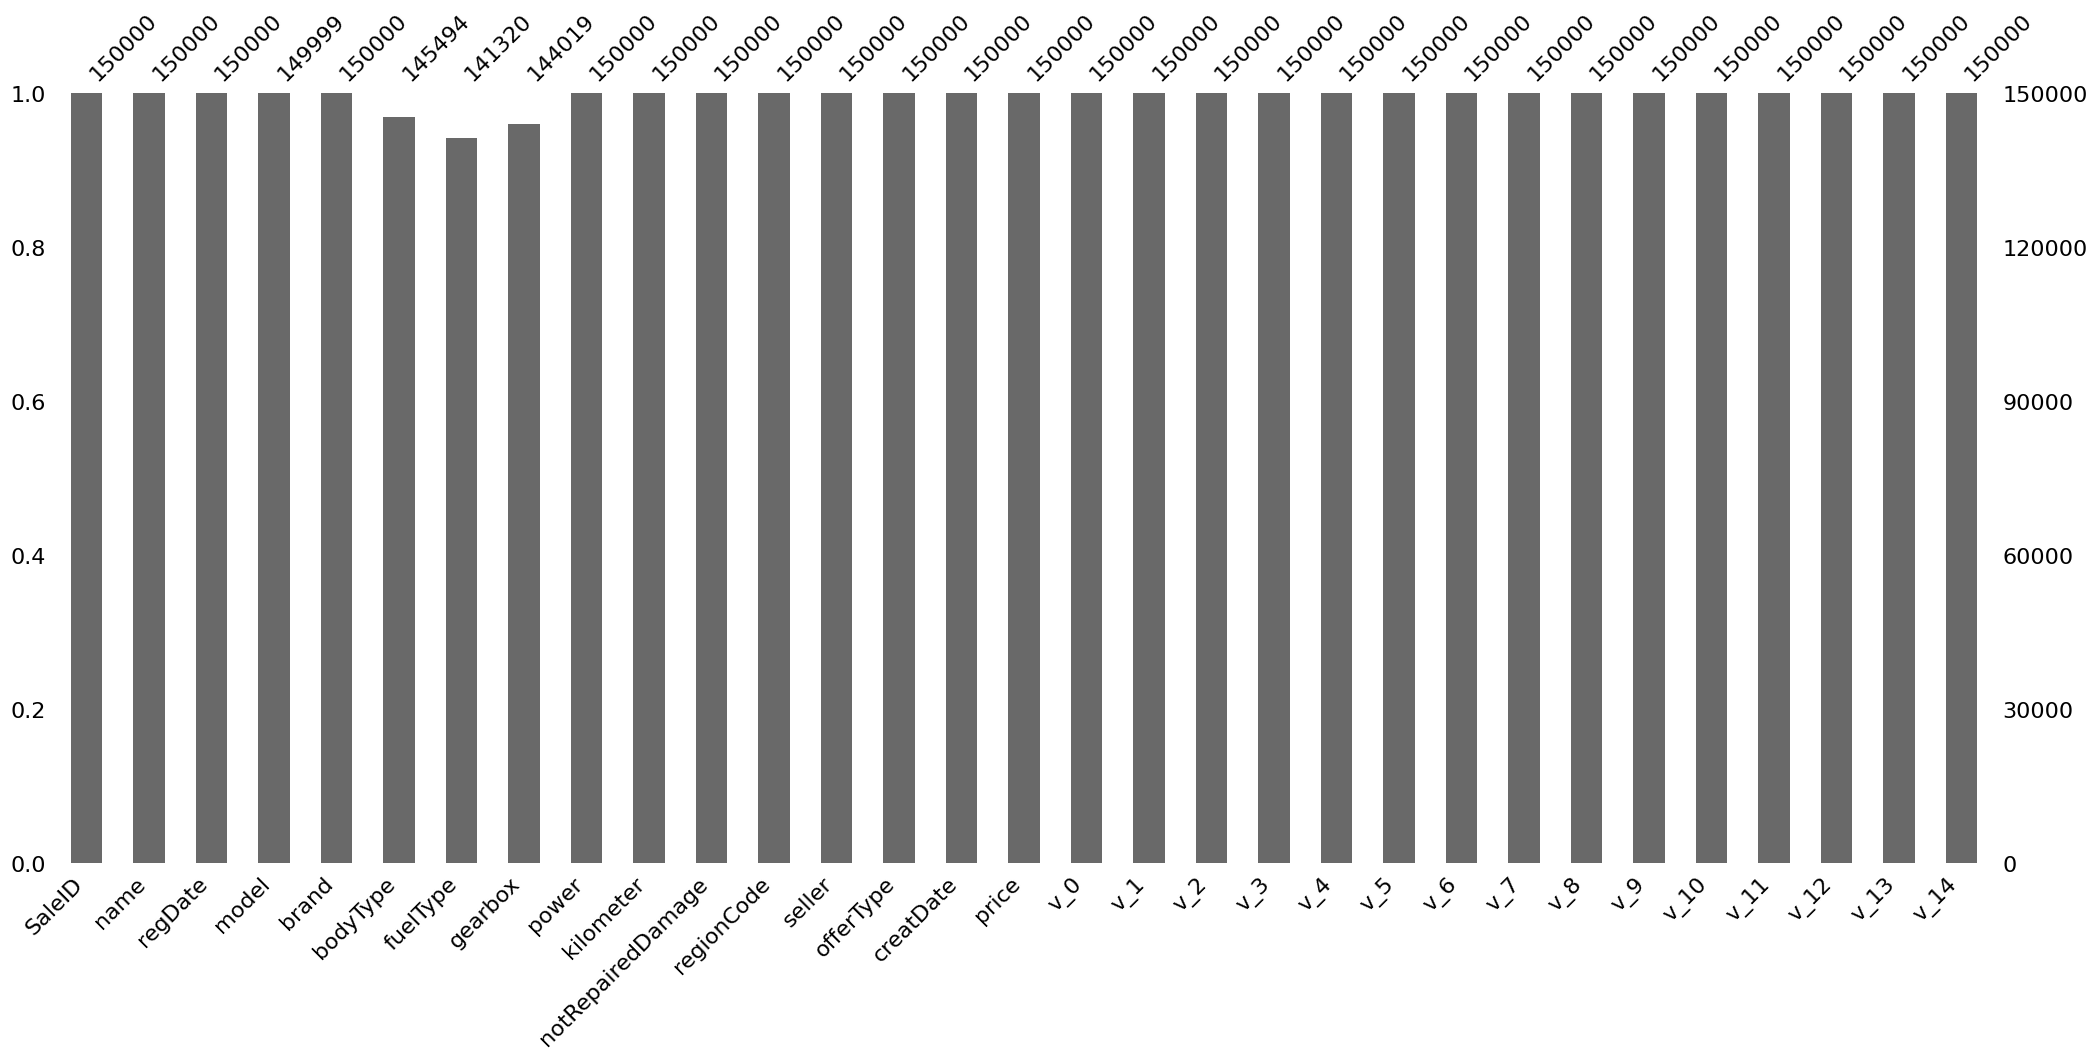

In [10]:
#输出数据列名（如型号、马力等），并输出每个列名有多少个数据（应该是150000个），以及数据类型和缺失信息
# 发现部分特征存在缺失值，如3、5、6、7.
Train_data.info()
msno.bar(Train_data.sample(150000))

In [11]:
# 查看每个列的缺失值情况

Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

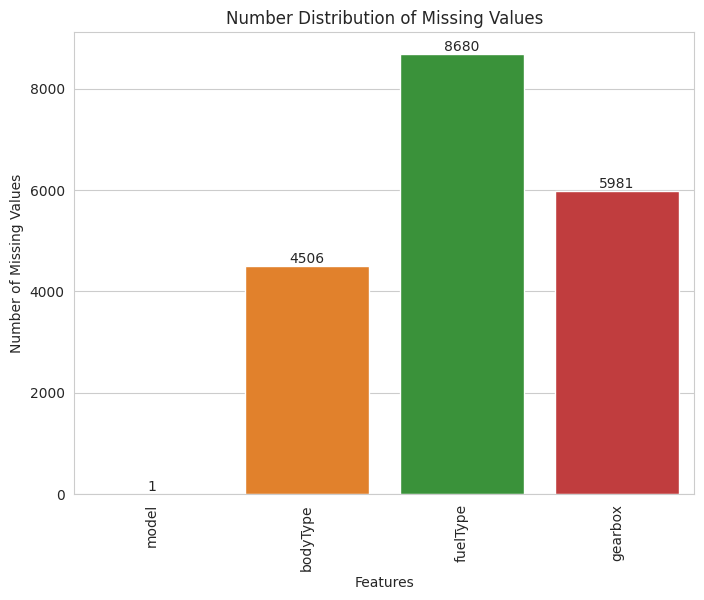

<AxesSubplot:>

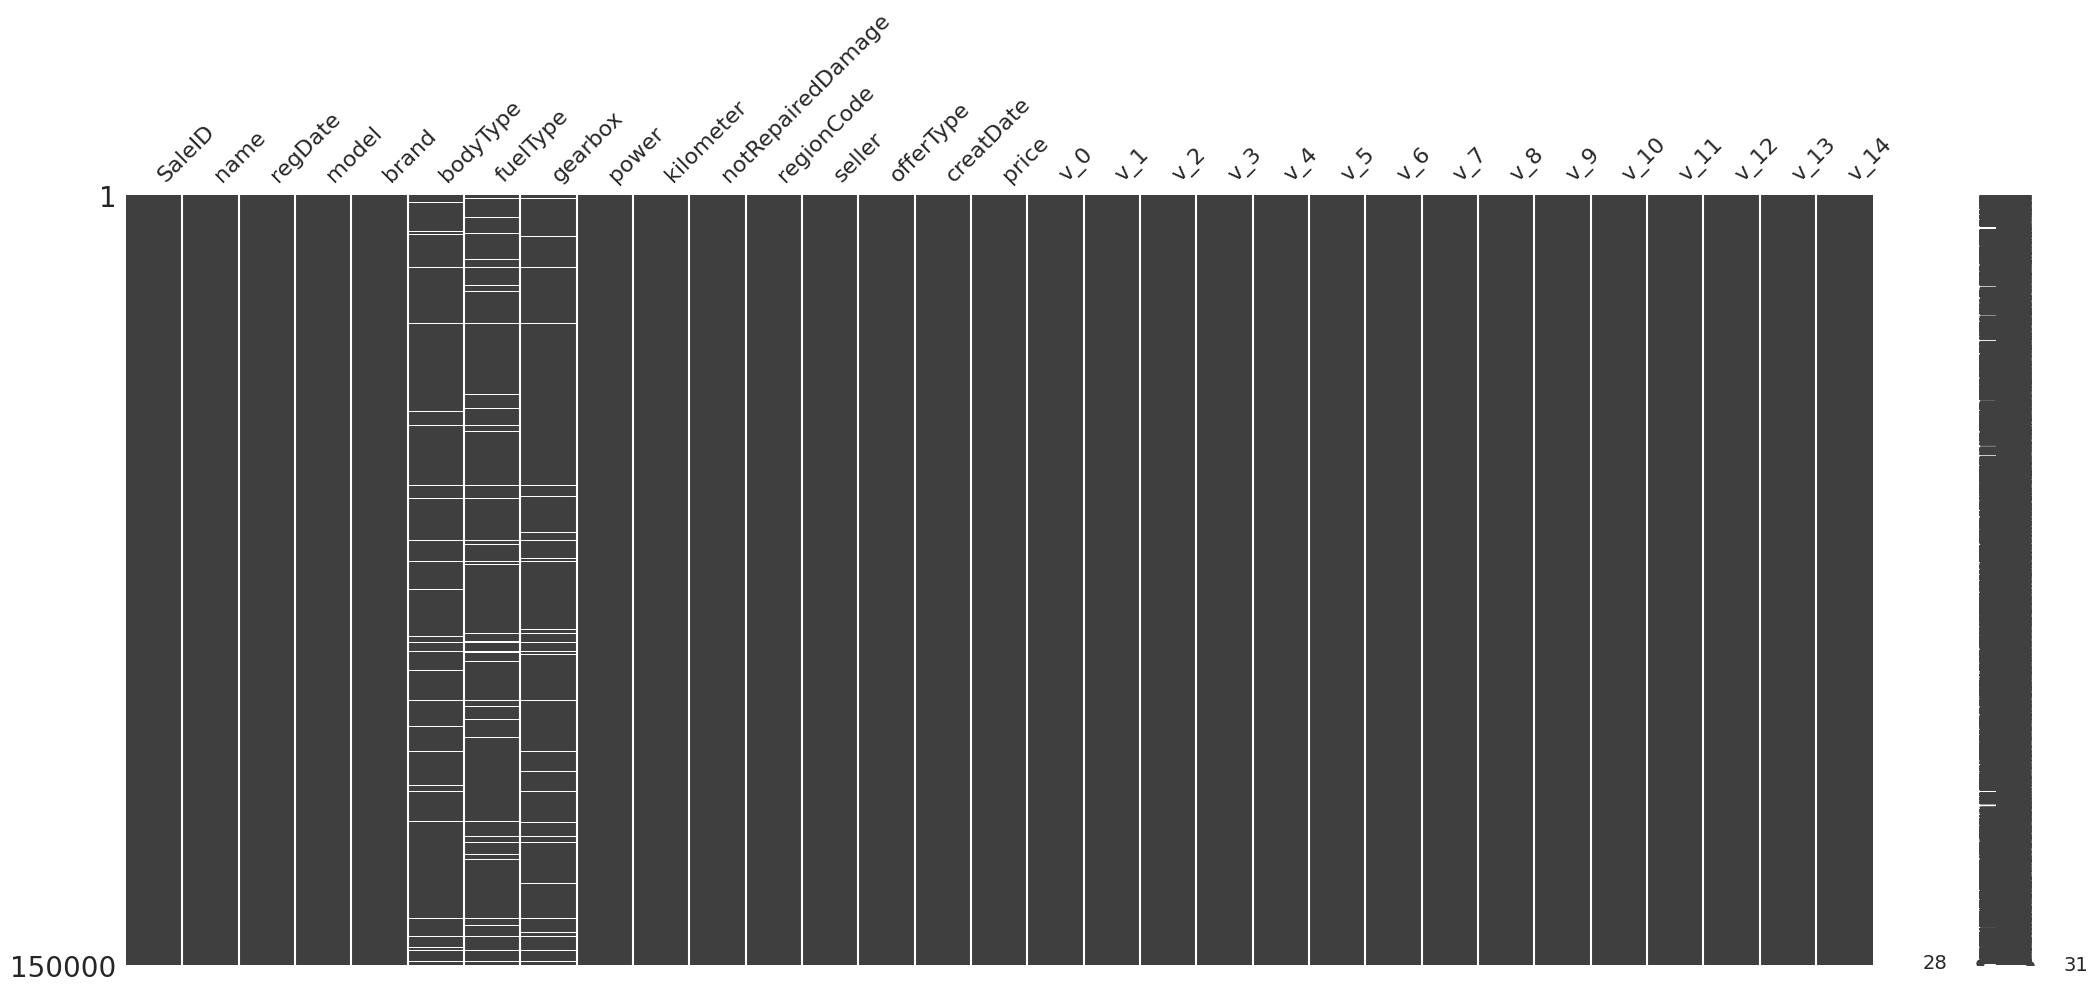

In [12]:
# 5. 可视化缺失值！
# 柱状图
sns.set_style('whitegrid')
# 计算缺失值
missing = Train_data.isnull().sum()
missing = missing[missing > 0]

# 将数据转化为长格式
f_missing = pd.DataFrame({'Features': missing.index, 'Missing Count': missing.values})

# 绘制图形
plt.figure(figsize=(8, 6))
sns.barplot(x='Features', y='Missing Count', data=f_missing)
plt.title('Number Distribution of Missing Values')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)

# 在每个柱状图上添加缺失值数量
for i in range(len(f_missing)):
    plt.text(i, f_missing.iloc[i]['Missing Count'], f_missing.iloc[i]['Missing Count'], ha='center', va='bottom')

# 显示
plt.show()
msno.matrix(Train_data.sample(150000))

**后续对训练集和测试集的缺失值一起处理**

In [13]:
# 仔细查看一下notRepairedDamage这个列的取值，因为它是唯一属性是object的列。
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [14]:
#测试集的也输出一下，方便一起处理
TestB_data['notRepairedDamage'].value_counts()

0.0    37224
-       8069
1.0     4707
Name: notRepairedDamage, dtype: int64

In [15]:
# 把“-”替换成缺失值
Train_data['notRepairedDamage'].replace('-', np.nan, inplace = True)

# 同时对测试集也这样操作
TestB_data['notRepairedDamage'].replace('-', np.nan, inplace = True)

# 再输出一下，发现取值为"-“的数据不显示了，成功！
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [16]:
TestB_data['notRepairedDamage'].value_counts()

0.0    37224
1.0     4707
Name: notRepairedDamage, dtype: int64

# 观察特征

In [17]:
# 类别特征


In [18]:
# 定义数字特征：（由于没有在数值类型上加以区分，因此我们需要人工挑选）
train_numeric_features= [
    'model', 'brand', 'bodyType', 'fuelType','gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode','seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3','v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12','v_13', 'v_14'
]


In [ ]:
# 可视化训练集的数字特征的概率分布
sns.set_style('whitegrid')
Train_data[train_numeric_features].describe()
f_train = pd.melt(Train_data, value_vars=train_numeric_features)
g_train = sns.FacetGrid(f_train, col = 'variable', col_wrap=3, sharex=False, sharey=False)
g_train = g_train.map(sns.distplot, "value")

plt.show()

**这里可以分析出哪些特征和价格的关联大，哪些特征的分布是有问题的**


In [19]:
# 可视化 测试集的数据特征分布
test_numeric_features = [
    'model', 'brand', 'bodyType', 'fuelType','gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode','seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3','v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12','v_13', 'v_14'
]

In [ ]:
sns.set_style('whitegrid')
f_test = pd.melt(TestB_data, value_vars=test_numeric_features)
g_test = sns.FacetGrid(f_test, col = 'variable', col_wrap=3, sharex=False, sharey=False)
g_test = g_test.map(sns.distplot, "value")
plt.show()


# 相关性分析

In [20]:
price_numeric = Train_data[train_numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False), '\n')

price         1.000000
v_12          0.692823
v_8           0.685798
v_0           0.628397
gearbox       0.329075
bodyType      0.241303
power         0.219834
fuelType      0.200536
v_5           0.164317
model         0.136983
v_2           0.085322
v_6           0.068970
v_1           0.060914
v_14          0.035911
regionCode    0.014036
creatDate     0.002955
seller       -0.002004
v_13         -0.013993
brand        -0.043799
v_7          -0.053024
v_4          -0.147085
v_9          -0.206205
v_10         -0.246175
v_11         -0.275320
kilometer    -0.440519
v_3          -0.730946
offerType          NaN
Name: price, dtype: float64 



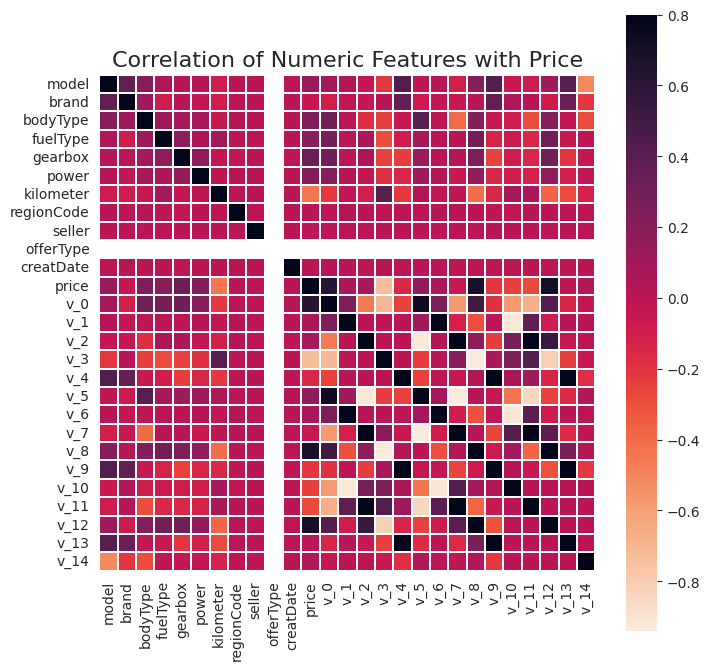

In [21]:
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Correlation of Numeric Features with Price', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, linewidths=0.1, cmap=sns.cm.rocket_r)
plt.show()

# 处理目标值长尾分布

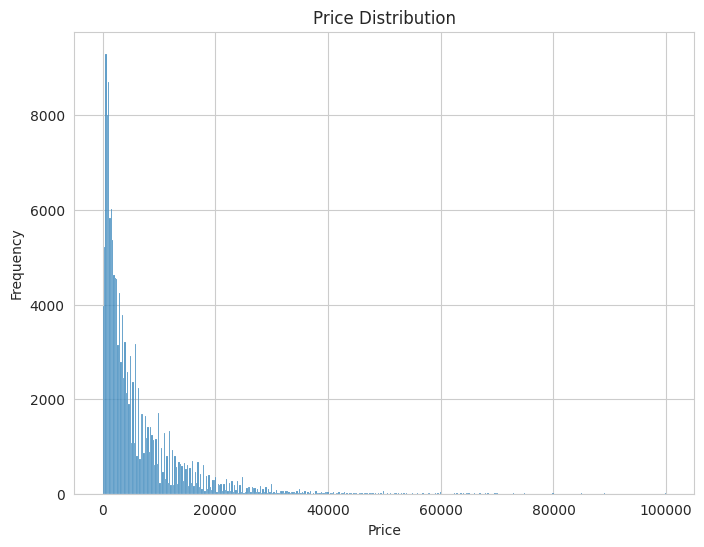

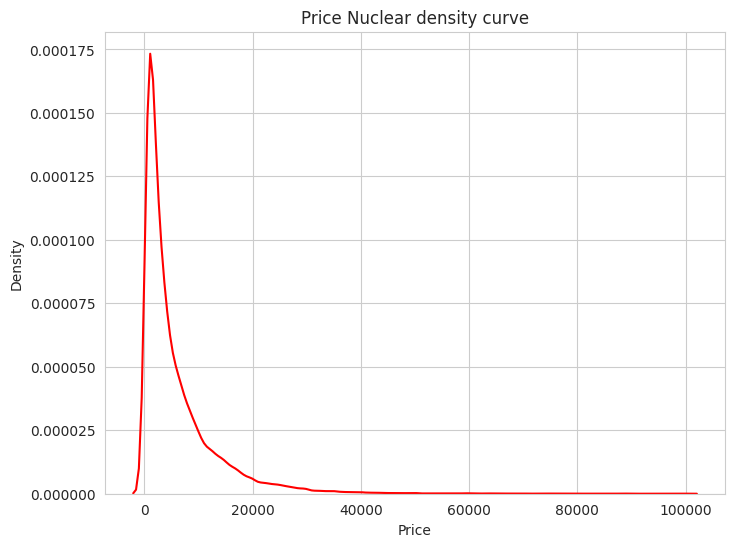

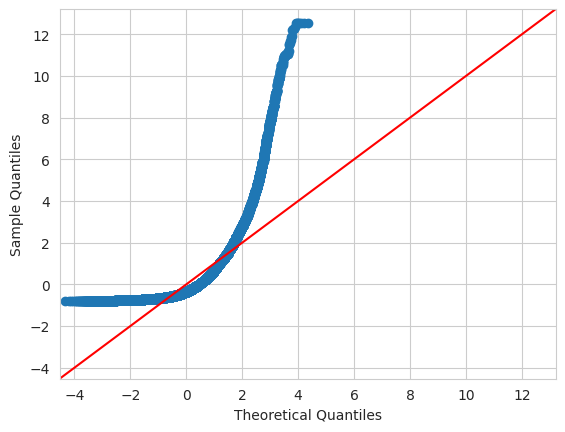

In [22]:
# 同时在上图中可以看出price分布存在明显的长尾情况
# 单独输出price的分布，查明
target = Train_data['price']

Train_data['price'] = np.log(Train_data['price'])

plt.figure(figsize=(8, 6))
sns.histplot(target, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8, 6))
sns.kdeplot(target, color='red')
plt.title('Price Nuclear density curve')
plt.xlabel('Price')
plt.ylabel('Density')
# Q-Q图
sm.qqplot(target, fit=True, line='45')
# 显示图形
plt.show()


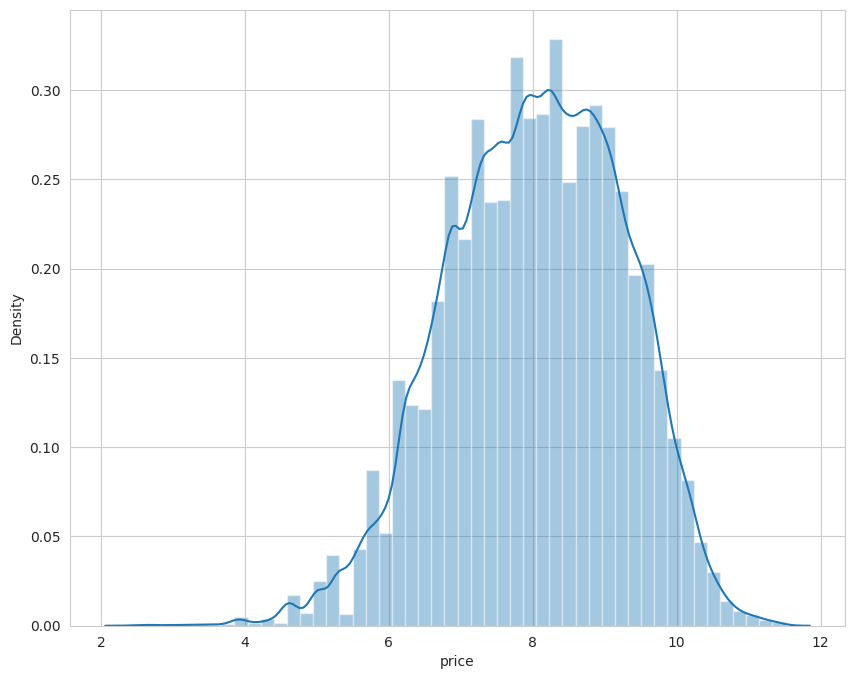

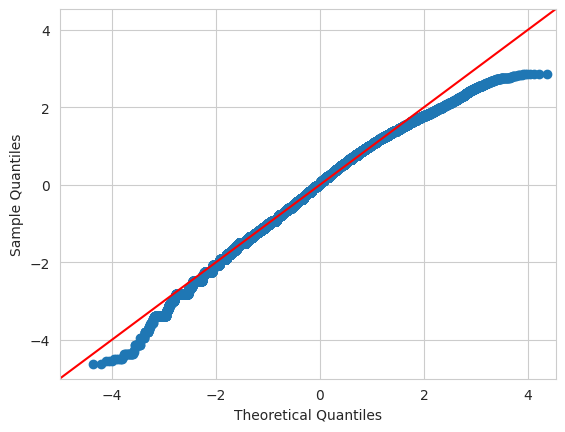

In [24]:
# 处理长尾数据：用log（1p）进行压缩转换
Target = np.log(target)
plt.figure(figsize=(10,8))
sns.distplot(Target)


# Q-Q图，结论：很接近正态分布，log处理成功
sm.qqplot(Target, fit=True, line='45')

plt.show()

# 处理严重倾斜数据

In [25]:
# 发现seller和offerType分布很离谱（严重倾斜），对结果的预测没有什么帮助
# 查明并删除这两个数据

print("训练集的特征seller数据分布：")
print(Train_data['seller'].value_counts())

print("\n训练集的特征offerType数据分布：")
print(Train_data['offerType'].value_counts())

print("\n测试集的特征seller数据分布：")
print(TestB_data['seller'].value_counts())

print("\n测试集的特征offerType数据分布：")
print(TestB_data['offerType'].value_counts())

训练集的特征seller数据分布：
0    149999
1         1
Name: seller, dtype: int64

训练集的特征offerType数据分布：
0    150000
Name: offerType, dtype: int64

测试集的特征seller数据分布：
0    50000
Name: seller, dtype: int64

测试集的特征offerType数据分布：
0    50000
Name: offerType, dtype: int64


In [26]:
# 合并训练集和测试集，方便操作

# 标记来源，防止训练集和测试集弄混
Train_data["origin"] = "Train"
TestB_data["origin"] = "TestB"

#合并为新的数据：data
data = pd.concat([Train_data, TestB_data], axis = 0, ignore_index = True)

In [27]:
# 删除
del data["seller"]
del data["offerType"]

In [28]:
# 判断是否包含 "seller" 和 "price" 列
if data.columns.isin(['seller', 'offerType']).all():
    print('Error：please check the last code')
else:
    print('seller和offerType删除成功')

seller和offerType删除成功


In [29]:
# 处理缺失值

#查看缺失值
data.isnull().sum()[data.isnull().sum() > 0]

model                    1
bodyType              6010
fuelType             11604
gearbox               7949
notRepairedDamage    32393
price                50000
dtype: int64

In [30]:
# 用众数填充缺失值
data.fuelType.fillna(data.fuelType.mode()[0], inplace=True)
data.gearbox.fillna(data.gearbox.mode()[0], inplace=True)
data.bodyType.fillna(data.bodyType.mode()[0], inplace=True)
data.model.fillna(data.model.mode()[0], inplace=True)
data.notRepairedDamage.fillna(data.notRepairedDamage.mode()[0], inplace=True)

# 特征工程

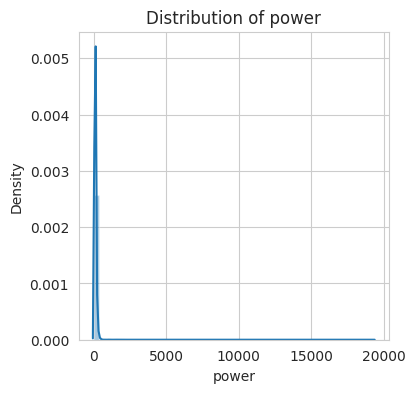

In [31]:
# 处理power特征

# 看一下power特征分布，发现分布异常
plt.figure(figsize=(4, 4))
plt.title("Distribution of power")
sns.distplot(data['power'])
plt.show()

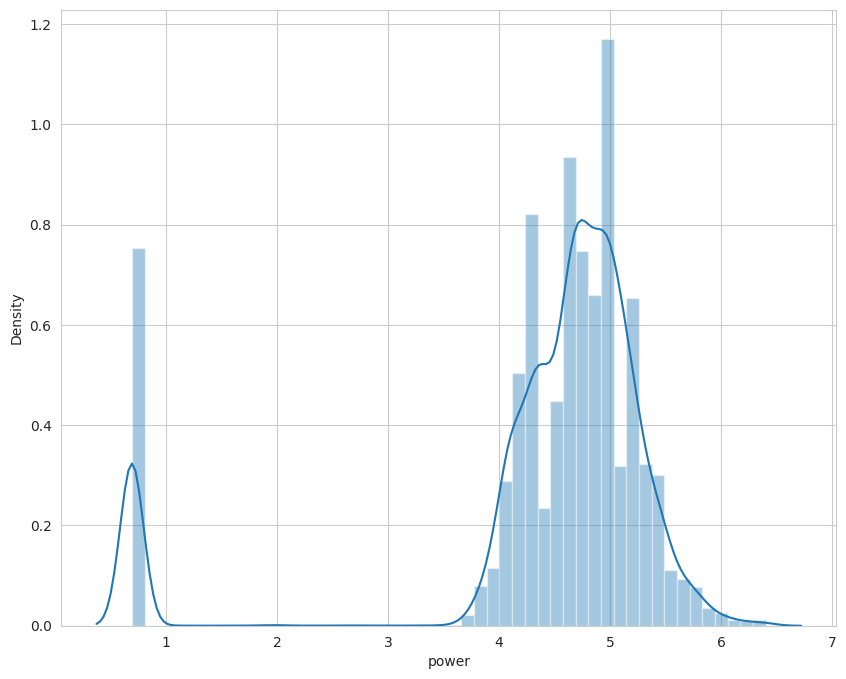

In [32]:
# 方法1：数据分箱操作 + log压缩

data['power'] = data['power'].map(lambda x: 600 if x > 600 else x)
#处理0-300
bin = [i * 10 for i in range(0,31)]
data['power_bin'] = pd.cut(data['power'], bin, labels = False)
data[['power_bin','power']].head()

#处理300以上：设置为 第31等级
data['power_bin'] = data['power_bin'].fillna(31)

# log压缩
data['power'] = np.log1p(data['power'] + 1) 

# 可视化处理之后的power特征
plt.figure(figsize=(10, 8))
sns.distplot(data['power'])
plt.show()

In [33]:
# 构造新特征：使用时间 = 开售时间 - 注册时间
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
data["used_time"] = data["used_time"].fillna(data["used_time"].mean())
# 查看一下训练集和测试集的used_time的缺失值
print(data['used_time'].isnull().sum())


0


In [34]:
# 统计销售量

#对数据按照brand特征分组
grouped_data = Train_data.groupby("brand")

#定义一个空字典，存放所有的分组信息
brand_info = {}

#定义 分组名和分组数据 遍历分组
for brand_name, brand_data in grouped_data:
    info = {}
    brand_data = brand_data[brand_data["price"] > 0]
    #筛选出价格大于0的有效数据
    valid_data = brand_data[brand_data['price'] > 0]
    # 计算各类统计量
    info['amount'] = len(valid_data)
    info['price_max'] = valid_data['price'].max()
    info['price_median'] = valid_data['price'].median()
    info['price_min'] = valid_data['price'].min()
    info['price_sum'] = valid_data['price'].sum()
    info['price_std'] = valid_data['price'].std()
    info['price_average'] = round(valid_data['price'].sum() / (len(valid_data) + 1), 2)
    brand_info[brand_name] = info
    
brand_feature = pd.DataFrame(brand_info).T.reset_index().rename(columns = {"index":"brand"})
data = data.merge(brand_feature, how='left', on='brand')

In [35]:
# 归一化

#定义需要归一化的特征列表
max_min_feature_list = ["amount", "price_max", "price_median", "price_min", "price_sum", "price_std", "price_average"]

#封装一个归一化函数
def max_min_fun(x):
    max_mined_feature = x - np.min(x) / np.max(x) - np.min(x) 
    return max_mined_feature

# 执行
for feature in max_min_feature_list:
    data[feature] = max_min_fun(data[feature])

In [36]:
# 01向量化
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType','fuelType','gearbox', 
                                     'notRepairedDamage', 'power_bin'],dummy_na=True)

In [37]:
# 删除无用特征 为什么无用？可以看一下他们的介绍
data = data.drop(['creatDate',"regDate", "regionCode"], axis = 1)

# 建立模型

In [38]:
import warnings
warnings.filterwarnings('ignore')
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import torch
import torch.nn as nn
#from torch.autograd import Variable
import torch.optim as optim

In [39]:
# 拆分数据集
X_train = data[data["origin"] == "Train"]
X_test = data[data["origin"] == "TestB"]


In [40]:
# 提取label
X_train_label = X_train.pop('price')
# 转化
X_train_label = X_train_label.astype('float16')
print(type(X_train_label))

<class 'pandas.core.series.Series'>


In [56]:
# 剔除不必要的列

#X_train_SaleID = X_train.pop('SaleID')
#X_train_name = X_train.pop('name')
#X_test_SaleID = X_test.pop('SaleID')
#X_test_name = X_test.pop('name')

#X_train_origin = X_train.pop('origin')
#X_test_origin = X_test.pop('origin')

#X_train_price = X_train.pop('price')
#X_test_price = X_test.pop('price')

In [57]:
print(X_train.shape)
print(X_test.shape)

(150000, 370)
(50000, 370)


In [58]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [59]:
"""
最后确认一下
训练集：X_train
测试机：X_test
训练集标签：X_train_label
"""
print(X_train_label)
print(type(X_train_label))
print(type(X_train))
print(type(X_test))

0         7.523438
1         8.187500
2         8.734375
3         7.785156
4         8.554688
            ...   
149995    8.679688
149996    9.156250
149997    8.921875
149998    8.515625
149999    8.453125
Name: price, Length: 150000, dtype: float16
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [60]:
print(X_train)
print(X_test)

           power  kilometer        v_0       v_1       v_2       v_3  \
0       4.127134       12.5  43.357796  3.966344  0.050257  2.159744   
1       0.693147       15.0  45.305273  5.236112  0.137925  1.380657   
2       5.105945       12.5  45.978359  4.823792  1.319524 -0.998467   
3       5.273000       15.0  45.687478  4.492574 -0.050616  0.883600   
4       4.248495        5.0  44.383511  2.031433  0.572169 -1.571239   
...          ...        ...        ...       ...       ...       ...   
149995  5.105945       15.0  45.316543 -3.139095 -1.269707 -0.736609   
149996  4.844187       10.0  45.972058 -3.143764 -0.023523 -2.366699   
149997  4.521789        6.0  44.733481 -3.105721  0.595454 -2.279091   
149998  5.062595       15.0  45.658634 -3.204785 -0.441680 -1.179812   
149999  5.273000       12.5  45.536383 -3.200326 -1.612893 -0.067144   

             v_4       v_5       v_6       v_7  ...  power_bin_22.0  \
0       1.143786  0.235676  0.101988  0.129549  ...             

In [ ]:
print(X_train.select_dtypes(include=['object']).columns)

for x in X_train.columns:
    if x == 'origin':
        print("fuck you")

In [ ]:

for x in X_train.columns:
    print(x)

            

In [67]:
# 自己写的模型

# 搭建模型
class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, output_dim):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim3, hidden_dim4)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dim4, hidden_dim5)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(hidden_dim5, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        out = self.relu5(out)
        out = self.fc6(out)
        return out
    
# 超参数设定
input_dim = X_train.shape[1]
hidden_dim1 = 100
hidden_dim2 = 50
hidden_dim3 = 25
hidden_dim4 = 15
hidden_dim5 = 5
output_dim = 1
learning_rate = 0.001
num_epochs = 5000


# 初始化模型
model = MyModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, output_dim)


# 定义损失函数和优化器
criterion = nn.L1Loss()  # 损失函数是MSELoos，可以换成L1loos，使用：nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# 转化为numpy数组,再转化为torch张量
x_train = torch.tensor(X_train.values, dtype = torch.float32)  # 训练集转化为张量
y_train = torch.tensor(X_train_label.values.reshape(-1, 1), dtype = torch.float32)  # 标签转化为张量

# 方便存储loss
train_losses = []


# 训练模型
for epoch in range(num_epochs):
    # 前向传播
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())  # 记录每次迭代的loss值
    # 反向传播和参数更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    # 输出结果
    if(epoch +1)%10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


# 可视化训练过程中的loss值
plt.plot(range(num_epochs), train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Epoch [10/5000], Loss: 3.1072
Epoch [20/5000], Loss: 3.0236
Epoch [30/5000], Loss: 2.8688
Epoch [40/5000], Loss: 2.7717
Epoch [50/5000], Loss: 2.7475
Epoch [60/5000], Loss: 2.7182
Epoch [70/5000], Loss: 2.6934
Epoch [80/5000], Loss: 2.6890
Epoch [90/5000], Loss: 2.6797
Epoch [100/5000], Loss: 2.6593
Epoch [110/5000], Loss: 2.5850
Epoch [120/5000], Loss: 2.5808
Epoch [130/5000], Loss: 2.5819
Epoch [140/5000], Loss: 2.4765
Epoch [150/5000], Loss: 2.6140
Epoch [160/5000], Loss: 3.3247
Epoch [170/5000], Loss: 2.9359
Epoch [180/5000], Loss: 2.3375
Epoch [190/5000], Loss: 3.3686
Epoch [200/5000], Loss: 2.4836
Epoch [210/5000], Loss: 2.8435
Epoch [220/5000], Loss: 2.9135
Epoch [230/5000], Loss: 2.5252
Epoch [240/5000], Loss: 2.1759
Epoch [250/5000], Loss: 2.1213
Epoch [260/5000], Loss: 2.3684
Epoch [270/5000], Loss: 2.1283
Epoch [280/5000], Loss: 2.0007
Epoch [290/5000], Loss: 2.3278
Epoch [300/5000], Loss: 1.9925
Epoch [310/5000], Loss: 2.3108
Epoch [320/5000], Loss: 2.7835
Epoch [330/5000],

Epoch [2610/5000], Loss: 0.5675
Epoch [2620/5000], Loss: 0.4454
Epoch [2630/5000], Loss: 0.7494
Epoch [2640/5000], Loss: 0.5167
Epoch [2650/5000], Loss: 0.4185
Epoch [2660/5000], Loss: 0.6579
Epoch [2670/5000], Loss: 0.4442
Epoch [2680/5000], Loss: 0.3645
Epoch [2690/5000], Loss: 0.6539
Epoch [2700/5000], Loss: 0.4902
Epoch [2710/5000], Loss: 0.3861
Epoch [2720/5000], Loss: 1.6089
Epoch [2730/5000], Loss: 0.6835
Epoch [2740/5000], Loss: 0.6771
Epoch [2750/5000], Loss: 0.6476
Epoch [2760/5000], Loss: 0.3480
Epoch [2770/5000], Loss: 0.6654
Epoch [2780/5000], Loss: 1.2322
Epoch [2790/5000], Loss: 0.6091
Epoch [2800/5000], Loss: 0.5957
Epoch [2810/5000], Loss: 0.9515
Epoch [2820/5000], Loss: 0.7316
Epoch [2830/5000], Loss: 0.5317
Epoch [2840/5000], Loss: 0.6813
Epoch [2850/5000], Loss: 0.6135
Epoch [2860/5000], Loss: 2.3536
Epoch [2870/5000], Loss: 1.1015
Epoch [2880/5000], Loss: 1.0010
Epoch [2890/5000], Loss: 0.8237
Epoch [2900/5000], Loss: 0.3933
Epoch [2910/5000], Loss: 0.3418
Epoch [2

KeyboardInterrupt: 

In [62]:
x_test = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = pd.DataFrame(np.exp(model(x_test).detach().numpy()))

y_test_id = pd.read_csv('./used_car_sample_submit.csv')
result = pd.concat([y_test_id['SaleID'], y_pred], axis=1)
result.columns = ['SaleID','price']
result.to_csv('./result6.csv', index=False)